In [1]:
import pandas as pd
import BirdStrike as fu
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.metrics import mean_squared_error
from pandas import concat
from pandas import Series, DataFrame
import statsmodels.api as sm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#packages for machine learning
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import ast

In [2]:
# pip install --user pandas_profiling

In [3]:
project = pd.read_csv("Wildlife_Export_5182021.csv", low_memory=False, thousands=',')
pd.set_option('display.max_columns', None)

In [4]:
project.head()
project.shape

,INDX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,LOCATION,ENROUTE_STATE,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTER_NAME,REPORTER_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,1098408,2021-05-01,5,2021,18:56,NaN,KACY,ATLANTIC CITY INTL,39.45758,-74.57717,31,NJ,AEA,NaN,NaN,UNK,UNKNOWN,,,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,YI005,Barn swallow,DEAD Barn SWALLOW FOUND AT RWY 31 BETWEEN 2000...,True,False,Unknown,,1,Small,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Carcass Found,2021-05-07,False
1,1098401,2021-05-01,5,2021,22:52,NaN,KGRR,GERALD R. FORD INTL ARPT,42.88082,-85.52277,26L,MI,AGL,NaN,NaN,DAL,DELTA AIR LINES,N360DN,832,A-321,04A,7.0,10.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Approach,900.0,160.0,3.0,No Cloud,None,1.0,NaN,175.0,NaN,175.0,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,NaN,None,NaN,UNKBM,Unknown bird - medium,"Bottom of fuselage, just aft of radome. No dam...",False,False,No,,1,Medium,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Pilot,2021-05-07,False
2,1098406,2021-05-01,5,2021,08:15,NaN,KABQ,ALBUQUERQUE INTL SUNPORT,35.04022,-106.60919,8,NM,ASW,NaN,NaN,UNK,UNKNOWN,,,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,R2008,Burrowing owl,Remains found on RWY 8 at 10800' remaining at ...,True,False,Unknown,,1,Small,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Carcass Found,2021-05-07,False
3,1098405,2021-05-01,5,2021,10:30,NaN,KPUB,PUEBLO MEMORIAL ARPT,38.28909,-104.49657,,CO,ANM,NaN,NaN,UNK,UNKNOWN,,,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,YH004,Horned lark,NaN,True,False,Unknown,,1,Small,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Carcass Found,2021-05-07,False
4,1098404,2021-05-01,5,2021,07:30,NaN,KJAX,JACKSONVILLE INTL,30.49406,-81.68786,8/26,FL,ASO,NaN,NaN,UNK,UNKNOWN,,,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,R2203,Great horned owl,Airport Ops found intact bird remains on Rwy 8...,True,False,Unknown,,1,Large,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Carcass Found,2021-05-0

(44706, 99)

In [5]:
# project = project.dropna(how='all')
# Print info
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44706 entries, 0 to 44705
Data columns (total 99 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INDX_NR                44706 non-null  int64  
 1   INCIDENT_DATE          44706 non-null  object 
 2   INCIDENT_MONTH         44706 non-null  int64  
 3   INCIDENT_YEAR          44706 non-null  int64  
 4   TIME                   44706 non-null  object 
 5   TIME_OF_DAY            20882 non-null  object 
 6   AIRPORT_ID             44706 non-null  object 
 7   AIRPORT                44706 non-null  object 
 8   LATITUDE               38386 non-null  object 
 9   LONGITUDE              38386 non-null  float64
 10  RUNWAY                 44706 non-null  object 
 11  STATE                  38386 non-null  object 
 12  FAAREGION              38386 non-null  object 
 13  LOCATION               6223 non-null   object 
 14  ENROUTE_STATE          967 non-null    object 
 15  OP

In [6]:
# Take a look at unique values in the dataset
project.nunique()
# Finding the null values for each column
print(project.isnull().sum())

INDX_NR           44706
INCIDENT_DATE      1097
INCIDENT_MONTH       12
INCIDENT_YEAR         4
TIME               1904
                  ...  
REPORTER_TITLE        1
SOURCE                9
PERSON                6
LUPDATE             429
TRANSFER              1
Length: 99, dtype: int64

INDX_NR           0
INCIDENT_DATE     0
INCIDENT_MONTH    0
INCIDENT_YEAR     0
TIME              0
                 ..
REPORTER_TITLE    0
SOURCE            0
PERSON            2
LUPDATE           0
TRANSFER          0
Length: 99, dtype: int64


In [7]:
>>> list(project.columns)

['INDX_NR',
 'INCIDENT_DATE ',
 'INCIDENT_MONTH',
 'INCIDENT_YEAR',
 'TIME',
 'TIME_OF_DAY',
 'AIRPORT_ID',
 'AIRPORT',
 'LATITUDE',
 'LONGITUDE',
 'RUNWAY',
 'STATE',
 'FAAREGION',
 'LOCATION',
 'ENROUTE_STATE',
 'OPID',
 'OPERATOR',
 'REG',
 'FLT',
 'AIRCRAFT',
 'AMA',
 'AMO',
 'EMA',
 'EMO',
 'AC_CLASS',
 'AC_MASS',
 'TYPE_ENG',
 'NUM_ENGS',
 'ENG_1_POS',
 'ENG_2_POS',
 'ENG_3_POS',
 'ENG_4_POS',
 'PHASE_OF_FLIGHT',
 'HEIGHT',
 'SPEED',
 'DISTANCE',
 'SKY',
 'PRECIPITATION',
 'AOS',
 'COST_REPAIRS',
 'COST_OTHER',
 'COST_REPAIRS_INFL_ADJ',
 'COST_OTHER_INFL_ADJ',
 'INGESTED',
 'INDICATED_DAMAGE',
 'DAMAGE_LEVEL',
 'STR_RAD',
 'DAM_RAD',
 'STR_WINDSHLD',
 'DAM_WINDSHLD',
 'STR_NOSE',
 'DAM_NOSE',
 'STR_ENG1',
 'DAM_ENG1',
 'ING_ENG1',
 'STR_ENG2',
 'DAM_ENG2',
 'ING_ENG2',
 'STR_ENG3',
 'DAM_ENG3',
 'ING_ENG3',
 'STR_ENG4',
 'DAM_ENG4',
 'ING_ENG4',
 'STR_PROP',
 'DAM_PROP',
 'STR_WING_ROT',
 'DAM_WING_ROT',
 'STR_FUSE',
 'DAM_FUSE',
 'STR_LG',
 'DAM_LG',
 'STR_TAIL',
 'DAM_TAIL',
 '

In [8]:
#Calculate summary statistics
summary = project.describe(include=['object'])
summary = summary.transpose()
summary.head()
print(project.describe(include='all'))

,count,unique,top,freq
INCIDENT_DATE,44706,1097,2018-10-12,141
TIME,44706,1904,,10979
TIME_OF_DAY,20882,4,Day,12296
AIRPORT_ID,44706,1191,ZZZZ,6317
AIRPORT,44706,1194,UNKNOWN,6317


             INDX_NR INCIDENT_DATE   INCIDENT_MONTH  INCIDENT_YEAR   TIME  \
count   4.470600e+04          44706    44706.000000   44706.000000  44706   
unique           NaN           1097             NaN            NaN   1904   
top              NaN     2018-10-12             NaN            NaN          
freq             NaN            141             NaN            NaN  10979   
mean    9.411565e+05            NaN        7.306156    2019.058583    NaN   
std     1.052112e+05            NaN        2.703366       0.871520    NaN   
min     8.037050e+05            NaN        1.000000    2018.000000    NaN   
25%     8.211412e+05            NaN        5.000000    2018.000000    NaN   
50%     9.487485e+05            NaN        8.000000    2019.000000    NaN   
75%     1.035283e+06            NaN        9.000000    2020.000000    NaN   
max     1.099956e+06            NaN       12.000000    2021.000000    NaN   

       TIME_OF_DAY AIRPORT_ID  AIRPORT  LATITUDE     LONGITUDE RUNWAY  STAT

In [9]:
#Frequency distribution of some key variables

# Cases by State
count_state = DataFrame({'count' : project.groupby( ['STATE'] ).size()}).reset_index()
count_state.sort_values(['count'], ascending=0).head(10)

# Cases by Aircraft Make/Model
count_air_make = DataFrame({'count' : project.groupby( ['AIRCRAFT'] ).size()}).reset_index()
count_air_make.sort_values(['count'], ascending=0).head(10)

# top 10 bird species - all strikes
count_species = DataFrame({'count' : project.groupby( ['SPECIES'] ).size()}).reset_index()
count_species.sort_values(['count'], ascending=0).head(10)


# number of birds in the strike
count_species = DataFrame({'count' : project.groupby( ['NUM_STRUCK'] ).size()}).reset_index()
count_species.sort_values(['count'], ascending=0).head(10)


# SIZE of the bird
count_species = DataFrame({'count' : project.groupby( ['SIZE'] ).size()}).reset_index()
count_species.sort_values(['count'], ascending=0).head(10)


# Time of the day 
count_species = DataFrame({'count' : project.groupby( ['TIME_OF_DAY'] ).size()}).reset_index()
count_species.sort_values(['count'], ascending=0).head(10)


# type of the sky 
count_species = DataFrame({'count' : project.groupby( ['SKY'] ).size()}).reset_index()
count_species.sort_values(['count'], ascending=0).head(10)


# Month wise analysis
count_species = DataFrame({'count' : project.groupby( ['INCIDENT_MONTH'] ).size()}).reset_index()
count_species.sort_values(['count'], ascending=0).head(12)

,STATE,count
50,TX,4218
11,FL,3792
6,CA,2804
7,CO,2005
17,IL,1729
37,NY,1573
49,TN,1263
25,MI,1223
20,KY,1179
38,OH,1168


,AIRCRAFT,count
397,UNKNOWN,15351
50,B-737-700,2913
53,B-737-800,2723
6,A-320,2502
239,EMB-170,2279
7,A-321,1607
5,A-319,1480
184,CRJ100/200,1123
189,CRJ900,1094
238,EMB-145,978


,SPECIES,count
549,Unknown bird,6579
552,Unknown bird - small,6261
356,Mourning dove,2621
41,Barn swallow,2183
301,Killdeer,1982
15,American kestrel,1514
551,Unknown bird - medium,1476
285,Horned lark,1440
191,Eastern meadowlark,952
209,European starling,817


,NUM_STRUCK,count
1,1,40678
3,2-10,3737
0,,163
2,11-100,123
4,More than 100,5


,SIZE,count
2,Small,31042
1,Medium,4615
0,Large,2463


,TIME_OF_DAY,count
1,Day,12296
3,Night,6558
2,Dusk,1100
0,Dawn,928


,SKY,count
0,No Cloud,8364
2,Some Cloud,6271
1,Overcast,3008


,INCIDENT_MONTH,count
7,8,6622
8,9,6204
9,10,6056
6,7,5951
4,5,4316
5,6,3759
10,11,2954
3,4,2584
2,3,1957
11,12,1548


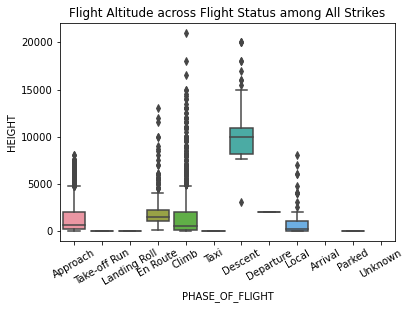

In [10]:
flight_altitude = sns.boxplot(x="PHASE_OF_FLIGHT", y="HEIGHT", data=project)
flight_altitude.set_xticklabels(flight_altitude.get_xticklabels(), rotation=30);
flight_altitude.set_title('Flight Altitude across Flight Status among All Strikes');

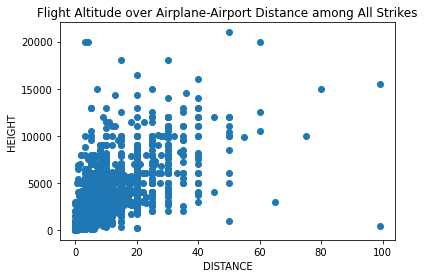

In [11]:
pro = project.loc[(~project['DISTANCE'].isnull()) &
                        (~project['HEIGHT'].isnull()) ]
plt.scatter(x='DISTANCE', y='HEIGHT', 
              data= pro);
plt.xlabel('DISTANCE');
plt.ylabel('HEIGHT');
plt.title('Flight Altitude over Airplane-Airport Distance among All Strikes');

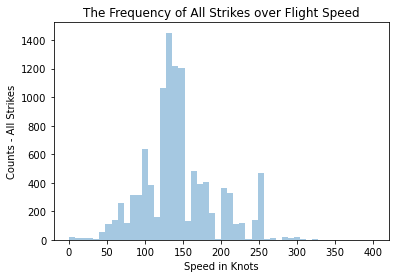

In [12]:
project.loc[project['SPEED'] > 610,'SPEED'] = np.nan
speed = sns.distplot(project['SPEED'].dropna(),kde=False);
speed.set(xlabel='Speed in Knots', ylabel='Counts - All Strikes');
speed.set_title('The Frequency of All Strikes over Flight Speed');

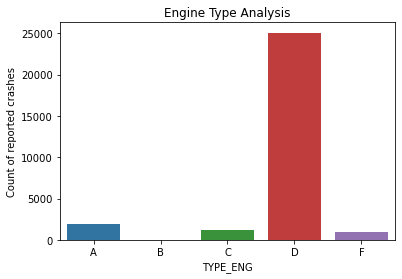

In [13]:
project.loc[(project['TYPE_ENG'] == ''),'TYPE_ENG'] = np.nan

# re-generate count table
count_type_eng = DataFrame({'count' : project.groupby( ['TYPE_ENG'] ).size()}).reset_index()
# plot the frequency of Engine Type
fig_eng_type = sns.barplot(x=u'TYPE_ENG', y='count', data=count_type_eng)
fig_eng_type.set(xlabel='TYPE_ENG', ylabel='Count of reported crashes');
fig_eng_type.set_title('Engine Type Analysis');

# Data Cleaning

In [14]:
# Drop INDX_NR column, incident index
project.drop('INDX_NR', axis = 1, inplace = True)

In [15]:
project['TIME_STRIP']=project['TIME'].map(lambda x: str(x)[:2])

def time_of_day(num):
    if num == '' or num == '  ':
        return np.nan
    num = int(num)
    if num > 5 and num < 8:
        return 'dawn'
    elif num > 8 and num < 17:
        return 'day'
    elif num > 17  and num < 20:
        return 'dusk'
    else:
        return 'night'
project['TIME_OF_DAY']=project['TIME_STRIP'].map(lambda x: time_of_day(x.strip().replace(':','')))

In [16]:
project.dtypes

INCIDENT_DATE     object
INCIDENT_MONTH     int64
INCIDENT_YEAR      int64
TIME              object
TIME_OF_DAY       object
                   ...  
SOURCE            object
PERSON            object
LUPDATE           object
TRANSFER            bool
TIME_STRIP        object
Length: 99, dtype: object

In [17]:

project_final = project[['INDICATED_DAMAGE' ,'INCIDENT_MONTH', 'TIME_OF_DAY', 'STATE', 'AIRCRAFT', 'TYPE_ENG', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED','SKY', 'SIZE', 'NUM_STRUCK']]
project_final = project_final.dropna(how='any')
project_final['INCIDENT_MONTH'] = pd.to_numeric(project_final['INCIDENT_MONTH'], errors='coerce')
project_final.isnull().sum()

INDICATED_DAMAGE    0
INCIDENT_MONTH      0
TIME_OF_DAY         0
STATE               0
AIRCRAFT            0
TYPE_ENG            0
PHASE_OF_FLIGHT     0
HEIGHT              0
SPEED               0
SKY                 0
SIZE                0
NUM_STRUCK          0
dtype: int64

In [18]:

project_without = project[['INDICATED_DAMAGE' ,'INCIDENT_MONTH', 'TIME_OF_DAY', 'STATE', 'AIRCRAFT', 'TYPE_ENG', 'PHASE_OF_FLIGHT', 'HEIGHT','DISTANCE', 'SPEED','SKY', 'SIZE', 'NUM_STRUCK']]
project_without = project_without.dropna(how='any')
project_without['INCIDENT_MONTH'] = pd.to_numeric(project_without['INCIDENT_MONTH'], errors='coerce')
project_without.isnull().sum()

INDICATED_DAMAGE    0
INCIDENT_MONTH      0
TIME_OF_DAY         0
STATE               0
AIRCRAFT            0
TYPE_ENG            0
PHASE_OF_FLIGHT     0
HEIGHT              0
DISTANCE            0
SPEED               0
SKY                 0
SIZE                0
NUM_STRUCK          0
dtype: int64

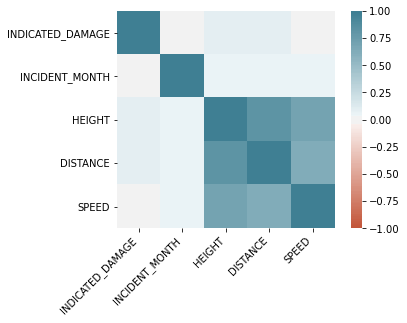

In [19]:
corr = project_without.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

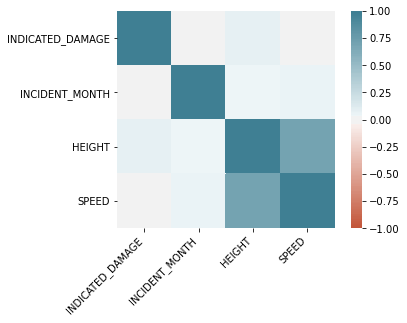

In [20]:
corr = project_final.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [21]:
# Get all features
features = [column_name for column_name in project_final.columns if column_name != 'INDICATED_DAMAGE']

# Get all categorical features
categorical = [column_name for column_name in features if project_final[column_name].dtype == 'object']

# Get all numeric columns
numeric = [column_name for column_name in features if column_name not in categorical]

In [22]:
#Print out the features
features

['INCIDENT_MONTH',
 'TIME_OF_DAY',
 'STATE',
 'AIRCRAFT',
 'TYPE_ENG',
 'PHASE_OF_FLIGHT',
 'HEIGHT',
 'SPEED',
 'SKY',
 'SIZE',
 'NUM_STRUCK']

In [23]:
# Print out the catergorical features 
categorical

['TIME_OF_DAY',
 'STATE',
 'AIRCRAFT',
 'TYPE_ENG',
 'PHASE_OF_FLIGHT',
 'SKY',
 'SIZE',
 'NUM_STRUCK']

In [24]:
# Print out the numeric features them out and make sure
numeric

['INCIDENT_MONTH', 'HEIGHT', 'SPEED']

The **null model** is a model of reference to use for classification accuracy - where the  **null accuracy** is the accuracy of the model if we always choose the most frequent class *(or outcome)*. Accuracy is determined here by the following:

<br>


$$\large{accuracy = \frac{\# \space times \space model \space is \space right}{total \space number \space of \space predictions}}$$

In [25]:
# Find the null model
project_final['INDICATED_DAMAGE'].value_counts() / project_final.shape[0]

False    0.902382
True     0.097618
Name: INDICATED_DAMAGE, dtype: float64

In [26]:
# Split data between X and label
X = project_final[features]
X = pd.get_dummies(X, columns = categorical,  drop_first = True)

y = project_final['INDICATED_DAMAGE'].replace({True: 1, False:0})

In [27]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train test splits
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.25, random_state=123)

In [28]:
# Import StandardScaler

train_numeric_transform, test_numeric_transform= fu.scaling(numeric, train_X, test_X)

# from sklearn.preprocessing import StandardScaler

# # Intialize a scaler
# scaler = StandardScaler()

# # Fit on training data
# scaler.fit(train_X[numeric])

# # Transform training and test data
# train_numeric_transform = scaler.transform(train_X[numeric])
# test_numeric_transform = scaler.transform(test_X[numeric])

In [29]:
# Replace columns in training and testing data accordingly
train_X[numeric] = train_numeric_transform
test_X[numeric] = test_numeric_transform

/Users/shashanpande/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shashanpande/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/Users/shashanpande/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [30]:
# Check out header again
train_X.head()

,INCIDENT_MONTH,HEIGHT,SPEED,TIME_OF_DAY_day,TIME_OF_DAY_dusk,TIME_OF_DAY_night,STATE_AK,STATE_AL,STATE_AR,STATE_AZ,STATE_BC,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_FN,STATE_GA,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_ON,STATE_OR,STATE_PA,STATE_PI,STATE_PR,STATE_QC,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,AIRCRAFT_A-300,AIRCRAFT_A-310,AIRCRAFT_A-319,AIRCRAFT_A-320,AIRCRAFT_A-321,AIRCRAFT_A-330,AIRCRAFT_A-350,AIRCRAFT_AA-1,AIRCRAFT_AA-5,AIRCRAFT_AEROS 350,AIRCRAFT_AG-5B,AIRCRAFT_ANTONOV 124,AIRCRAFT_AT-802,AIRCRAFT_ATR-42,AIRCRAFT_ATR-72,AIRCRAFT_AW 109,AIRCRAFT_AW 119,AIRCRAFT_AW 139,AIRCRAFT_B C-17 GLOBEMASTER,AIRCRAFT_B-717-200,AIRCRAFT_B-737,AIRCRAFT_B-737-200,AIRCRAFT_B-737-300,AIRCRAFT_B-737-400,AIRCRAFT_B-737-700,AIRCRAFT_B-737-800,AIRCRAFT_B-737-900,AIRCRAFT_B-747,AIRCRAFT_B-747-400,AIRCRAFT_B-747-8 SERIES,AIRCRAFT_B-757,AIRCRAFT_B-757-200,AIRCRAFT_B-757-300,AIRCRAFT_B-767,AIRCRAFT_B-767-200,AIRCRAFT_B-767-300,AIRCRAFT_B-767-400,AIRCRAFT_B-777,AIRCRAFT_B-777-200,AIRCRAFT_B-777-300,AIRCRAFT_B-787-8,AIRCRAFT_B-787-9,AIRCRAFT_B-STEARMAN,AIRCRAFT_BA-125-800,AIRCRAFT_BA-146,AIRCRAFT_BA-146-200,AIRCRAFT_BE-100 KING,AIRCRAFT_BE-1900,AIRCRAFT_BE-200 KING,AIRCRAFT_BE-23 MUSKETEER,AIRCRAFT_BE-23 SUNDOWNER,AIRCRAFT_BE-300 KING,AIRCRAFT_BE-33,AIRCRAFT_BE-35,AIRCRAFT_BE-350 SUPER KING,AIRCRAFT_BE-36,AIRCRAFT_BE-400 BJET,AIRCRAFT_BE-50 TWIN BONANZA,AIRCRAFT_BE-55 BARON,AIRCRAFT_BE-58 BARON,AIRCRAFT_BE-58 BARON,AIRCRAFT_BE-65 QUEEN,AIRCRAFT_BE-76 DUCHESS,AIRCRAFT_BE-90 KING,AIRCRAFT_BE-90 KING,AIRCRAFT_BE-95,AIRCRAFT_BE-99,AIRCRAFT_BE-PREMIER I,AIRCRAFT_BELL-205A1,AIRCRAFT_BELL-212,AIRCRAFT_BELL-407,AIRCRAFT_BELL-505,AIRCRAFT_BELLANCA CIT,AIRCRAFT_BELLANCA CMP,AIRCRAFT_C-12,AIRCRAFT_C-130,AIRCRAFT_C-150,AIRCRAFT_C-152,AIRCRAFT_C-162,AIRCRAFT_C-170,AIRCRAFT_C-172,AIRCRAFT_C-177,AIRCRAFT_C-182,AIRCRAFT_C-185,AIRCRAFT_C-195,AIRCRAFT_C-206,AIRCRAFT_C-208,AIRCRAFT_C-210 CENTUR,AIRCRAFT_C-310,AIRCRAFT_C-337,AIRCRAFT_C-340,AIRCRAFT_C-402,AIRCRAFT_C-406 CARAVA,AIRCRAFT_C-414,AIRCRAFT_C-441 CONQUE,AIRCRAFT_C-500,AIRCRAFT_C-550,AIRCRAFT_C-560,AIRCRAFT_C-650,AIRCRAFT_C-680,AIRCRAFT_CASA C-212,AIRCRAFT_CASA CN-235,AIRCRAFT_CH-46 SEA KNIGHT,AIRCRAFT_CHALLENGER 300,AIRCRAFT_CIRRUS SR 20/22,AIRCRAFT_CITATION,AIRCRAFT_CITATION EXL,AIRCRAFT_CITATION II,AIRCRAFT_CITATION MUSTANG 510,AIRCRAFT_CITATION VI,AIRCRAFT_CITATION VII,AIRCRAFT_CITATION X,AIRCRAFT_CITATIONJET,AIRCRAFT_CL-600,AIRCRAFT_CL-601/604,AIRCRAFT_CRJ 20,AIRCRAFT_CRJ100/200,AIRCRAFT_CRJ700,AIRCRAFT_CRJ900,AIRCRAFT_CV-580,AIRCRAFT_Challenger 350,AIRCRAFT_Challenger 600,AIRCRAFT_DA FALCON 7X,AIRCRAFT_DA-20 FALCON,AIRCRAFT_DA-200 FALCON,AIRCRAFT_DA-2000,AIRCRAFT_DA-50 FALCON,AIRCRAFT_DA-900,AIRCRAFT_DC-10,AIRCRAFT_DC-10-10,AIRCRAFT_DC-10-30,AIRCRAFT_DC-9,AIRCRAFT_DC-9-10,AIRCRAFT_DHC8 DASH 8,AIRCRAFT_DIAMOND 20,AIRCRAFT_DIAMOND 40,AIRCRAFT_DIAMOND 42,AIRCRAFT_DORNIER 328,AIRCRAFT_DORNIER 328J,AIRCRAFT_EADS CASA HC 144,AIRCRAFT_EC120,AIRCRAFT_EC130,AIRCRAFT_EC135,AIRCRAFT_ECLIPSE 500,AIRCRAFT_EMB PHENOM 10,AIRCRAFT_EMB PHENOM 100,AIRCRAFT_EMB PHENOM 300,AIRCRAFT_EMB-120,AIRCRAFT_EMB-135,AIRCRAFT_EMB-145,AIRCRAFT_EMB-170,AIRCRAFT_EMB-190,AIRCRAFT_EMB-500,AIRCRAFT_EUROCOPTER BK 117,AIRCRAFT_FAIRCHILD SA227,AIRCRAFT_GLOBAL EXPRS,AIRCRAFT_GROB 120A,AIRCRAFT_GROB 120TP,AIRCRAFT_GRUMAMER AA5,AIRCRAFT_GRUMMAN CS2,AIRCRAFT_GULFAERO III,AIRCRAFT_GULFAERO IV,AIRCRAFT_GULFSTREAM 200,AIRCRAFT_GULFSTREAM G 280,AIRCRAFT_GULFSTREAM G150,AIRCRAFT_GULFSTREAM GV1,AIRCRAFT_GULFSTREAM II,AIRCRAFT_GULFSTREAM V,AIRCRAFT_Gulfstream G550,AIRCRAFT_Gulfstream G600,AIRCRAFT_HAWKER,AIRCRAFT_HAWKER 1000,AIRCRAFT_HAWKER 4000,AIRCRAFT_HAWKER 800,AIRCRAFT_HH-60J,AIRCRAFT_HH-65,AIRCRAFT_HONDAJET HA-420,AIRCRAFT_IAI ASTRA JT,AIRCRAFT_IAI-

In [31]:
# KNN classifier
test_accuracy, train_accuracy = fu.KNN(train_X,train_Y,test_X, test_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))
print('Train accuracy:', round(train_accuracy, 4))

Test accuracy: 0.9099
Train accuracy: 0.9136


In [32]:
# Logistic regression
test_accuracy, train_accuracy = fu.Logistic(train_X,train_Y,test_X, test_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))
print('Train accuracy:', round(train_accuracy, 4))

Test accuracy: 0.9193
Train accuracy: 0.9176


In [ ]:
# Import relevant packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# # Instantiate decision tree and random forest classifiers
# dec_tree = DecisionTreeClassifier(random_state = 123)

# dec_tree.fit(train_X, train_Y)

# # Create Predictions on test and train data using decision tree
# pred_test_Y_tree = dec_tree.predict(test_X)
# pred_train_Y_tree = dec_tree.predict(train_X)

# # Calculate test and train accuracy score on decision tree
# test_accuracy_tree = accuracy_score(test_Y, pred_test_Y_tree)
# train_accuracy_tree = accuracy_score(train_Y, pred_train_Y_tree)

# Decision Tree
test_accuracy_tree, train_accuracy_tree = fu.DT(train_X,train_Y,test_X, test_Y)


# Print test accuracy score rounded to 4 decimals
print('Tree test accuracy:', round(test_accuracy_tree, 4))
print('Tree train accuracy:', round(train_accuracy_tree, 4))




# rand_forest = RandomForestClassifier(random_state = 123)

# # Fit decision tree and random forest on data
# rand_forest.fit(train_X, train_Y)



# # Create Predictions on test and train data using random forest
# pred_test_Y_forest = rand_forest.predict(test_X)
# pred_train_Y_forest = rand_forest.predict(train_X)



# # Calculate test and train accuracy score on random forest
# test_accuracy_forest = accuracy_score(test_Y, pred_test_Y_forest)
# train_accuracy_forest = accuracy_score(train_Y, pred_train_Y_forest)




# cv_scores = cross_val_score(dec_tree, train_X, train_Y, cv = 10)
# print(cv_scores)



# Random Forest
test_accuracy_forest, train_accuracy_forest = fu.RF(train_X,train_Y,test_X, test_Y)


# Print test accuracy score rounded to 4 decimals
print('\nForest test accuracy:', round(test_accuracy_forest, 4))
print('Forest train accuracy:', round(train_accuracy_forest, 4))

In [ ]:
# Import relevant modules 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Instantiate decision tree
dec_tree = DecisionTreeClassifier(random_state = 123)

# Get cross validation scores
cv_scores = cross_val_score(dec_tree, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
dec_tree.fit(train_X, train_Y)
y_pred = dec_tree.predict(test_X)

# Fit on data
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

In [ ]:
# Get all parameters of a decision tree
dec_tree = DecisionTreeClassifier()
dec_tree.get_params()

In [ ]:
# Import relevant modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

# Instantiate a decision tree with max_depth = 4
dec_tree = DecisionTreeClassifier(random_state = 123, max_depth = 4)

# Get cross validation scores
cv_scores = cross_val_score(dec_tree, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
dec_tree.fit(train_X, train_Y)
y_pred = dec_tree.predict(test_X)

# Print accuracy scores
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

In [ ]:
# Import relevant modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

# Instantiate a decision tree with max_depth = 4 and max_features = 25
dec_tree = DecisionTreeClassifier(random_state = 123, max_depth = 4, max_features = 20)

# Get cross validation scores
cv_scores = cross_val_score(dec_tree, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
dec_tree.fit(train_X, train_Y)
y_pred = dec_tree.predict(test_X)

# Print accuracy scores
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid
params = {'max_depth': [6,8,10,12],
          'max_features': [20,25,30]}

# Instantiate a decision tree classifier 
dec_tree = DecisionTreeClassifier(random_state = 123)

# Instantiate a GridSearchCV classifier with 10 fold cross-validation
clf = GridSearchCV(dec_tree, params, cv = 10, verbose = 2)

# Fit clf on training data
clf.fit(train_X, train_Y)

In [ ]:
# Generate predictions and calculate accuracy error
y_pred = clf.predict(test_X)
print('Best parameters: ', clf.best_params_)
print('\n',round(accuracy_score(y_pred, test_Y), 4))